## Exercise02 - London Weather Prediction

As the climate changes, predicting the weather becomes ever more important for businesses. You have been asked to support on a machine learning project with the aim of building a pipeline to predict the climate in London, England. Specifically, the model should predict mean temperature in degrees Celsius (°C).

Since the weather depends on a lot of different factors, you will want to run a lot of experiments to determine what the best approach is to predict the weather. In this project, you will run experiments for different regression models predicting the mean temperature.

### 💾 The data: `london_weather.csv`

- **date** - recorded date of measurement - (**int**)
- **cloud_cover** - cloud cover measurement in oktas - (**float**)
- **sunshine** - sunshine measurement in hours (hrs) - (**float**)
- **global_radiation** - irradiance measurement in Watt per square meter (W/m2) - (**float**)
- **max_temp** - maximum temperature recorded in degrees Celsius (°C) - (**float**)
- **mean_temp** - **target** mean temperature in degrees Celsius (°C) - (**float**)
- **min_temp** - minimum temperature recorded in degrees Celsius (°C) - (**float**)
- **precipitation** - precipitation measurement in millimeters (mm) - (**float**)
- **pressure** - pressure measurement in Pascals (Pa) - (**float**)
- **snow_depth** - snow depth measurement in centimeters (cm) - (**float**)

### Tasks :

<div class="alert alert-block alert-danger">
    🚫 <b> Restriction:</b> Please refrain from using <b>ChatGPT</b> to complete this exercise, as doing so may hinder your learning experience.
</div>

1. Use machine learning to predict the mean temperature in London, England.
    - Build a model to predict "mean_temp" (use both KNN and SVM algo).
    - Use jcopml modules to train and tune their hyperparameters, what is your best model?

In [1]:
import pandas as pd

# Read in the data
weather = pd.read_csv("london_weather.csv")

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [2]:
# Start coding here...
# Add as many cells as you like...

In [3]:
weather.tail(10)

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15331  20201222          8.0       0.0              16.0      11.7       11.7   
15332  20201223          7.0       0.0              23.0      14.0       12.0   
15333  20201224          2.0       1.3              32.0       6.1        6.1   
15334  20201225          6.0       3.5              40.0       4.6        2.6   
15335  20201226          NaN       2.1              38.0      10.0        4.9   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitation  pressure  snow_depth  
15331      11.7            0.6  100970.0         NaN  
15332      10.1            1.8  100550.0         NaN  
15333       6.1            0.0  101830.0         NaN  
15334       0.7            0.0  103100.0         NaN  
15335      -0.1           12.0  101960.0         NaN  
15336       7.6            2.0   98000.0         NaN  
15337      -1.3            0.2   97370.0         NaN  
15338       1.1            0.0   98830.0         NaN  
15339      -0.1            0.0  100200.0         NaN  
15340      -3.1            0.0  100500.0         NaN

In [4]:
weather.shape

(15341, 10)

In [5]:
# drop unncessary column
weather.drop(columns=["snow_depth"], inplace=True)

In [6]:
weather.head()

date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  
0      -7.5            0.4  101900.0  
1      -7.5            0.0  102530.0  
2      -7.2            0.0  102050.0  
3      -6.5            0.0  100840.0  
4      -1.4            0.0  102250.0

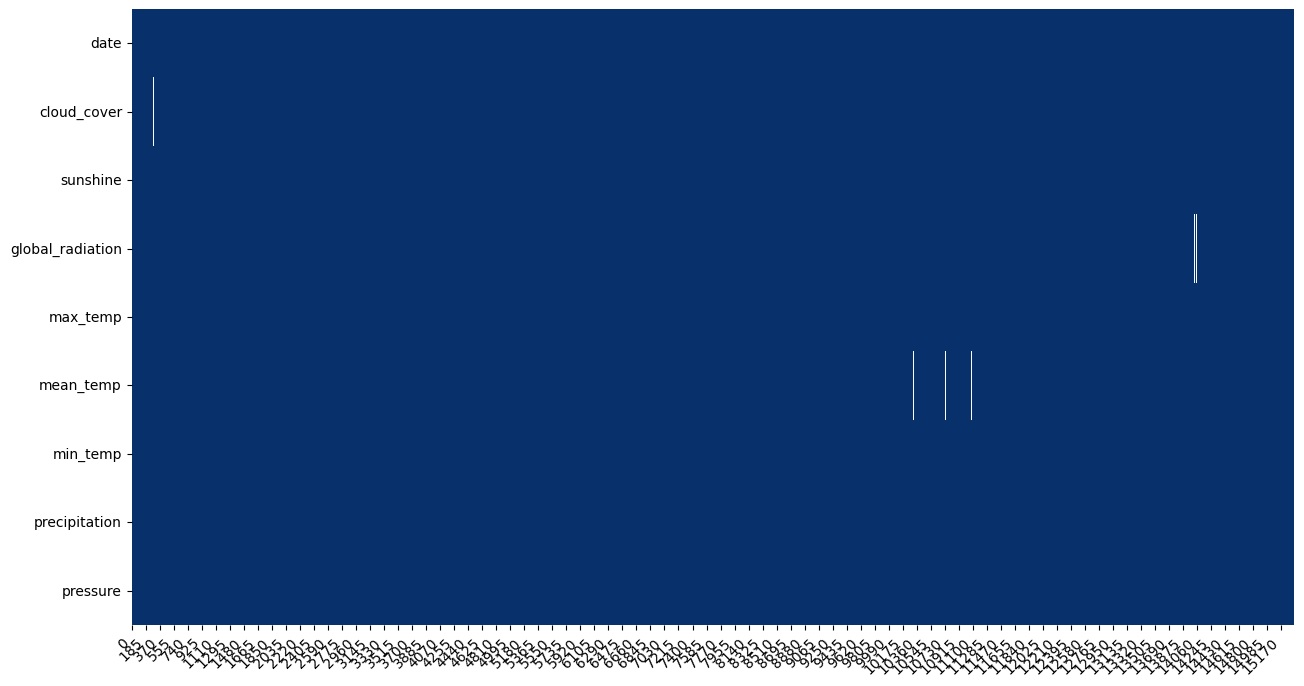

In [7]:
from jcopml.plot import plot_missing_value
plot_missing_value(weather)

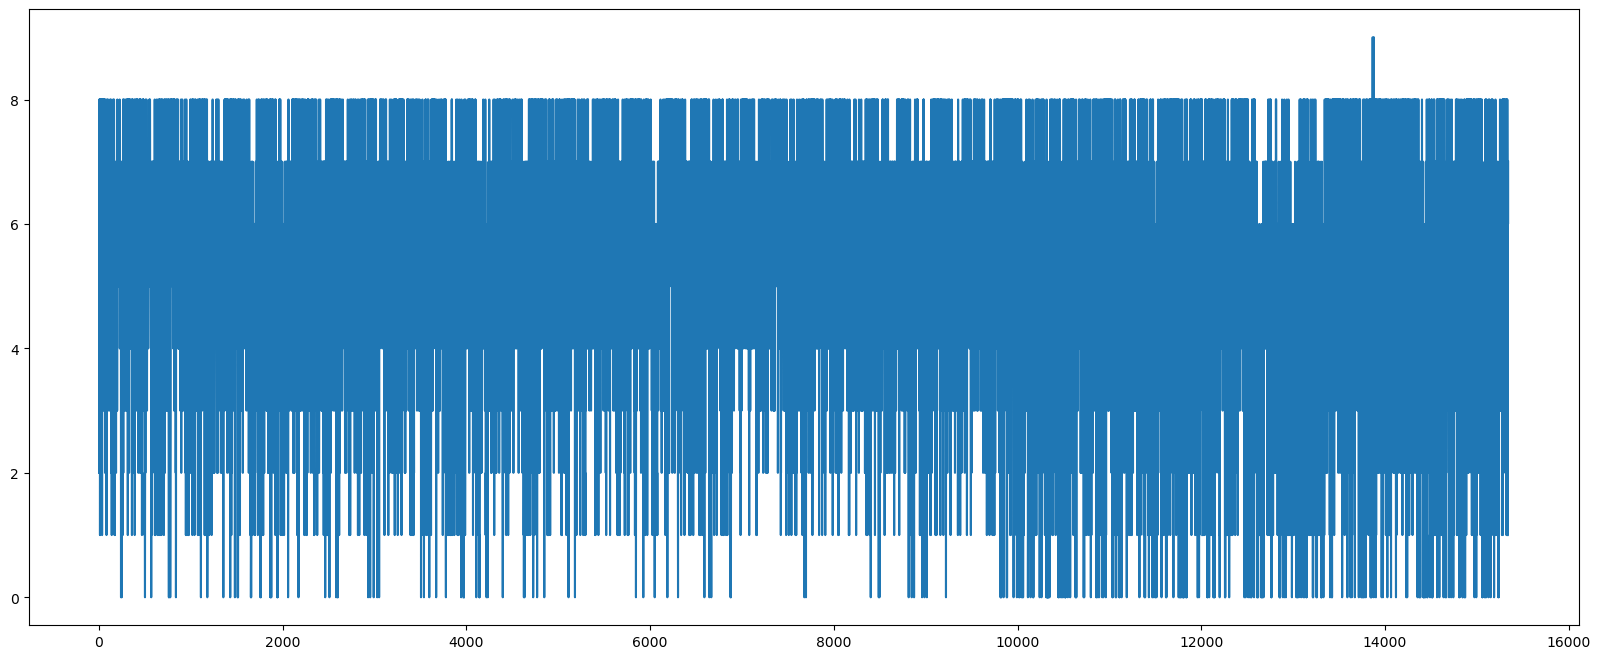

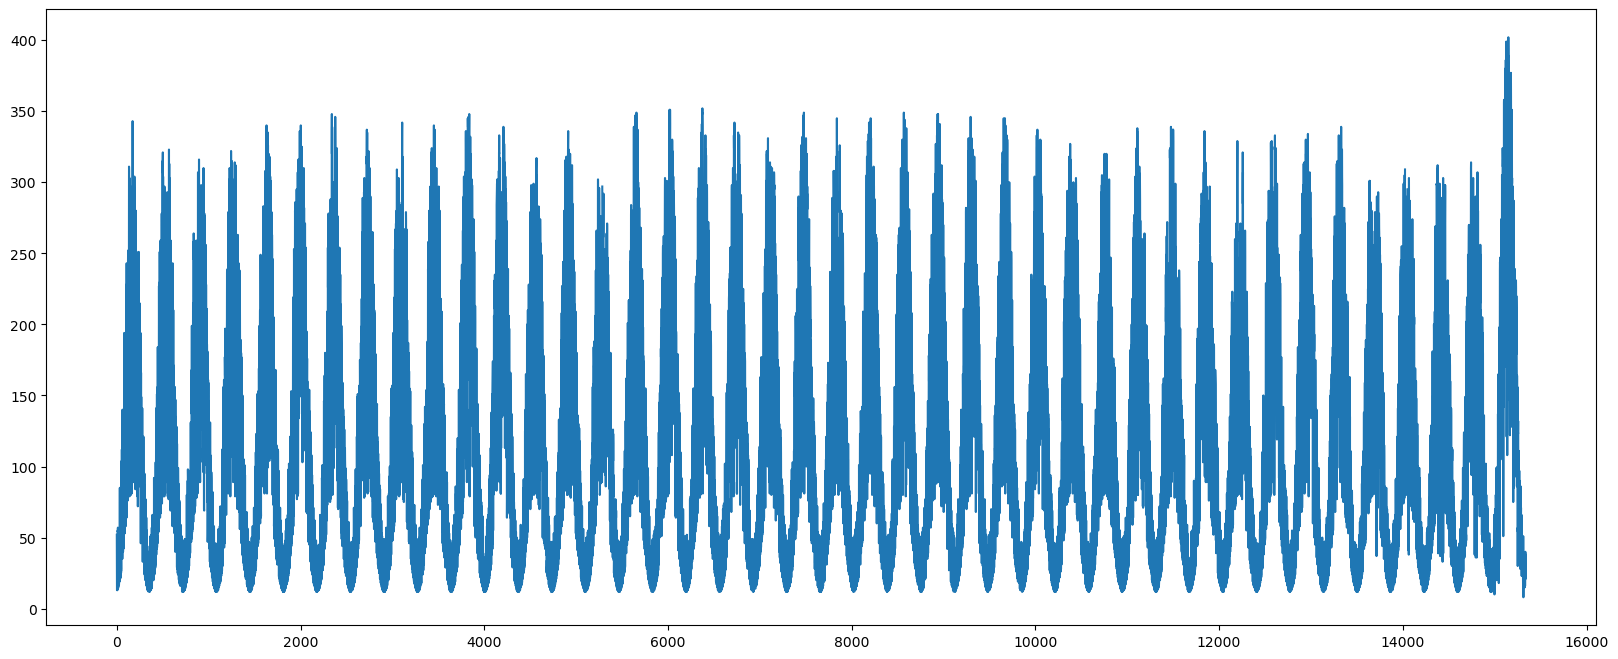

In [8]:
## plot cloud_cover data
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(weather.index, weather['cloud_cover'])
plt.show()

plt.figure(figsize=(20,8))
plt.plot(weather.index, weather['global_radiation'])
plt.show()

In [9]:
## save the index of missing value
missing_mean_temp = weather[weather['mean_temp'].isna()]#.index 
missing_cloud_cover = weather[weather['cloud_cover'].isna()]#.index
missing_global_radiation = weather[weather['global_radiation'].isna()]#.index
missing_max_temp = weather[weather['max_temp'].isna()]#.index
missing_min_temp = weather[weather['min_temp'].isna()]#.index
missing_precipitation = weather[weather['precipitation'].isna()]#.index
missing_pressure = weather[weather['pressure'].isna()]#.index

print('mean_temp')
display(missing_mean_temp)
print('cloud_cover')
display(missing_cloud_cover)
print('global_radiation')
display(missing_global_radiation)
print('max_temp')
display(missing_max_temp)
print('min_temp')
display(missing_min_temp)
print('precipitation')
display(missing_precipitation)
print('pressure')
display(missing_pressure)

missing_mean_temp_index = weather[weather['mean_temp'].isna()].index 
missing_cloud_cover_index = weather[weather['cloud_cover'].isna()].index
missing_global_radiation_index = weather[weather['global_radiation'].isna()].index

# print(weather.loc[missing_mean_temp_index])


mean_temp


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
9751   20050912          7.0       6.4             153.0      22.2        NaN   
9784   20051015          4.0       6.3             103.0      20.7        NaN   
9860   20051230          7.0       0.0              12.0       9.6        NaN   
9870   20060109          8.0       0.0              14.0       7.1        NaN   
9895   20060203          8.0       0.0              20.0       3.6        NaN   
9937   20060317          8.0       0.3              55.0       6.4        NaN   
9985   20060504          2.0      10.6             261.0      27.5        NaN   
10107  20060903          5.0       5.7             157.0      26.6        NaN   
10173  20061108          7.0       0.0              20.0      15.0        NaN   
10196  20061201          8.0       0.0              14.0      13.9        NaN   
10199  20061204          6.0       2.9              35.0      14.7        NaN   
10276  20070219          8.0       0.0              27.0      11.2        NaN   
10310  20070325          6.0       2.4             100.0      13.2        NaN   
10316  20070331          4.0       6.9             167.0      15.3        NaN   
10368  20070522          2.0      13.7             318.0      22.1        NaN   
10498  20070929          7.0       0.8              60.0      18.0        NaN   
10502  20071003          5.0       1.9              74.0      17.9        NaN   
10525  20071026          8.0       0.0              25.0      12.5        NaN   
10595  20080104          8.0       0.0              13.0       9.0        NaN   
10662  20080311          5.0       1.6              75.0      14.1        NaN   
10702  20080420          7.0       2.5             129.0      15.3        NaN   
10739  20080527          7.0       0.2              93.0      18.9        NaN   
10751  20080608          3.0      10.7             288.0      25.5        NaN   
10810  20080806          7.0       2.9             148.0      25.3        NaN   
10814  20080810          6.0       5.9             193.0      22.1        NaN   
10903  20081107          4.0       3.3              54.0      13.4        NaN   
11015  20090227          5.0       7.6             111.0      15.1        NaN   
11060  20090413          5.0       5.1             162.0      17.6        NaN   
11082  20090505          5.0       2.4             139.0      20.2        NaN   
15010  20200205          7.0       1.5              42.0       NaN        NaN   
15044  20200310          8.0       1.6              79.0       NaN        NaN   
15101  20200506          0.0       2.4             356.0       NaN        NaN   
15131  20200605          4.0       1.2             194.0      16.5        NaN   
15172  20200716          6.0       1.0             133.0       NaN        NaN   
15197  20200810          3.0      10.9             290.0       NaN        NaN   
15256  20201008          7.0       5.1             132.0       NaN        NaN   

       min_temp  precipitation  pressure  
9751       14.3            0.0  102140.0  
9784       13.2            0.0  102570.0  
9860       -1.4           11.8   99950.0  
9870        4.1            0.0  102540.0  
9895       -2.1            0.0  102480.0  
9937        1.4            0.0  102590.0  
9985       12.5            0.0  101390.0  
10107      16.0            0.0  101070.0  
10173       5.8            0.4  101920.0  
10196       8.8            2.4  101550.0  
10199       7.9            0.8   99650.0  
10276       6.8            1.0  101000.0  
10310       6.5            0.0  101860.0  
10316       6.9            0.0  102160.0  
10368      11.4            0.0  102110.0  
10498      12.4            0.2  101410.0  
10502      13.1            0.2  101820.0  
10525       8.8            0.0  102260.0  
10595       1.4            5.4   99950.0  
10662       5.2            1.0   98580.0  
10702       7.8            2.8  100240.0  
10739       9.9           11.8  100990.0  
10751      15.0         

cloud_cover


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
14     19790115          NaN       0.0              15.0       5.9        3.8   
20     19790121          NaN       0.0              16.0       1.5        0.0   
37     19790207          NaN       0.0              21.0       3.7        3.3   
50     19790220          NaN       0.0              27.0       3.6        1.6   
56     19790226          NaN       4.2              82.0       8.9        1.6   
250    19790908          NaN       5.9             153.0      21.8       17.9   
287    19791015          NaN       2.7              71.0      16.0       12.4   
320    19791117          NaN       0.0              17.0      10.0        4.8   
323    19791120          NaN       0.0              17.0       6.4        3.4   
324    19791121          NaN       0.0              16.0      10.2        3.0   
1074   19811210          NaN       0.0              12.0       0.7       -1.9   
2188   19841228          NaN       0.3              16.0       5.7        1.7   
3254   19871129          NaN       0.0              15.0       6.5        0.3   
3970   19891114          NaN       0.0              18.0      11.5        7.8   
10217  20061222          NaN       0.0              12.0       2.3       -0.2   
10583  20071223          NaN       0.0              12.0       8.0        3.2   
12011  20111120          NaN       0.0              17.0      11.5        5.3   
12114  20120302          NaN       3.4              88.0      15.0        7.5   
15335  20201226          NaN       2.1              38.0      10.0        4.9   

       min_temp  precipitation  pressure  
14          1.0            0.1  102990.0  
20         -3.5            0.1  102170.0  
37         -0.2            0.4   99450.0  
50          0.3            0.0  103010.0  
56         -3.4            0.0  103590.0  
250        11.5            0.0  101870.0  
287         7.0            0.0   99970.0  
320         1.2            0.9  100840.0  
323         0.5            0.0  102950.0  
324        -0.4            0.2  103390.0  
1074       -3.7            8.2  100230.0  
2188        0.4            0.0  103290.0  
3254       -2.8            0.0  102480.0  
3970        6.0            0.0  102950.0  
10217      -2.8            0.2  104380.0  
10583      -1.6            0.2  102820.0  
12011       2.2            0.2  101890.0  
12114       3.2            0.0  102560.0  
15335      -0.1           12.0  101960.0

global_radiation


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
5270   19930606          1.0      13.1               NaN      26.5       18.9   
5271   19930607          4.0      13.8               NaN      28.4       19.8   
5272   19930608          2.0      14.4               NaN      27.5       21.1   
5279   19930615          4.0      13.2               NaN      16.7       15.0   
5284   19930620          3.0      12.7               NaN      19.1       15.0   
5289   19930625          5.0      12.1               NaN      23.7       15.8   
5291   19930627          2.0      14.9               NaN      23.7       19.8   
5292   19930628          1.0      15.1               NaN      25.0       18.3   
5293   19930629          2.0      14.0               NaN      27.7       18.6   
5294   19930630          1.0      12.4               NaN      23.9       20.2   
5295   19930701          3.0      12.5               NaN      26.1       18.4   
5300   19930706          4.0      13.9               NaN      23.0       17.1   
5301   19930707          4.0      13.0               NaN      23.0       16.5   
13671  20160606          0.0      13.4               NaN      24.4       18.4   
14025  20170526          0.0      14.3               NaN      24.0       20.7   
14044  20170614          1.0      13.2               NaN      25.1       20.4   
14045  20170615          2.0      12.4               NaN      24.3       20.0   
14047  20170617          1.0      12.4               NaN      31.7       22.4   
14051  20170621          1.0      12.5               NaN      24.1       25.5   

       min_temp  precipitation  pressure  
5270       11.8            0.0  102040.0  
5271       13.0            0.0  101850.0  
5272       13.8            0.0  101600.0  
5279        8.9            3.0  102320.0  
5284        9.2            0.0  101980.0  
5289        9.9            0.0  102490.0  
5291       14.6            0.0  102100.0  
5292       12.9            0.0  102070.0  
5293       12.2            0.0  101640.0  
5294       12.8            0.0  101610.0  
5295       12.8            0.0  101910.0  
5300       10.1            0.0  103030.0  
5301       10.0            0.0  102680.0  
13671      11.8            0.0  102160.0  
14025      13.6            0.0  101760.0  
14044      13.6            0.0  101670.0  
14045      14.9            0.0  101490.0  
14047      14.6            0.0  102640.0  
14051      16.5            0.0  101430.0

max_temp


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15010  20200205          7.0       1.5              42.0       NaN        NaN   
15044  20200310          8.0       1.6              79.0       NaN        NaN   
15101  20200506          0.0       2.4             356.0       NaN        NaN   
15172  20200716          6.0       1.0             133.0       NaN        NaN   
15197  20200810          3.0      10.9             290.0       NaN        NaN   
15256  20201008          7.0       5.1             132.0       NaN        NaN   

       min_temp  precipitation  pressure  
15010       2.4            NaN  103640.0  
15044       6.4            NaN  100480.0  
15101       NaN            NaN  102510.0  
15172      16.1            NaN  102030.0  
15197      18.7            0.0  101370.0  
15256      12.2            0.4  101110.0

min_temp


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15101  20200506          0.0       2.4             356.0       NaN        NaN   
15131  20200605          4.0       1.2             194.0      16.5        NaN   

       min_temp  precipitation  pressure  
15101       NaN            NaN  102510.0  
15131       NaN            1.0   99710.0

precipitation


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15010  20200205          7.0       1.5              42.0       NaN        NaN   
15044  20200310          8.0       1.6              79.0       NaN        NaN   
15100  20200505          1.0       9.3             270.0      15.5       11.7   
15101  20200506          0.0       2.4             356.0       NaN        NaN   
15130  20200604          7.0       0.3             121.0      16.6       13.6   
15172  20200716          6.0       1.0             133.0       NaN        NaN   

       min_temp  precipitation  pressure  
15010       2.4            NaN  103640.0  
15044       6.4            NaN  100480.0  
15100       8.0            NaN  102090.0  
15101       NaN            NaN  102510.0  
15130      10.6            NaN  100410.0  
15172      16.1            NaN  102030.0

pressure


date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
362    19791229          4.0       5.5              45.0       4.4        4.0   
10101  20060828          5.0       7.0             188.0      20.0       16.6   
11013  20090225          7.0       0.0              30.0      10.0        9.3   
11014  20090226          7.0       0.5              42.0      10.0        7.8   

       min_temp  precipitation  pressure  
362         1.7            0.1       NaN  
10101      13.2            0.2       NaN  
11013       8.6            0.0       NaN  
11014       5.5            0.0       NaN

In [10]:
## fill missing value of mean_temp with mean of min and max
weather['mean_temp'].fillna(((weather['max_temp'] + weather['min_temp'])/2).round(1), inplace=True)

## fill missing value of cloud cover with common value
weather['cloud_cover'].fillna('6.0', inplace=True)

## fill missing value of global radiation Forward Fill (Fill with Previous Value)
weather['global_radiation'].fillna(method='ffill', inplace=True)

In [11]:
## recheck
missing_mean_temp = weather[weather['mean_temp'].isna()]#.index 
missing_cloud_cover = weather[weather['cloud_cover'].isna()]#.index
missing_global_radiation = weather[weather['global_radiation'].isna()]#.index
missing_max_temp = weather[weather['max_temp'].isna()]#.index
missing_min_temp = weather[weather['min_temp'].isna()]#.index
missing_precipitation = weather[weather['precipitation'].isna()]#.index
missing_pressure = weather[weather['pressure'].isna()]#.index
missing_date = weather[weather['date'].isna()]#.index
missing_sunshine = weather[weather['sunshine'].isna()]#.index

print('mean_temp')
display(missing_mean_temp)
print('cloud_cover')
display(missing_cloud_cover)
print('global_radiation')
display(missing_global_radiation)
print('max_temp')
display(missing_max_temp)
print('min_temp')
display(missing_min_temp)
print('precipitation')
display(missing_precipitation)
print('pressure')
display(missing_pressure)
print('date')
display(missing_date)
print('sunshine')
display(missing_sunshine)

print(weather.loc[missing_mean_temp_index])

mean_temp


date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15010  20200205         7.0       1.5              42.0       NaN        NaN   
15044  20200310         8.0       1.6              79.0       NaN        NaN   
15101  20200506         0.0       2.4             356.0       NaN        NaN   
15131  20200605         4.0       1.2             194.0      16.5        NaN   
15172  20200716         6.0       1.0             133.0       NaN        NaN   
15197  20200810         3.0      10.9             290.0       NaN        NaN   
15256  20201008         7.0       5.1             132.0       NaN        NaN   

       min_temp  precipitation  pressure  
15010       2.4            NaN  103640.0  
15044       6.4            NaN  100480.0  
15101       NaN            NaN  102510.0  
15131       NaN            1.0   99710.0  
15172      16.1            NaN  102030.0  
15197      18.7            0.0  101370.0  
15256      12.2            0.4  101110.0

cloud_cover


Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure]
Index: []

global_radiation


Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure]
Index: []

max_temp


date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15010  20200205         7.0       1.5              42.0       NaN        NaN   
15044  20200310         8.0       1.6              79.0       NaN        NaN   
15101  20200506         0.0       2.4             356.0       NaN        NaN   
15172  20200716         6.0       1.0             133.0       NaN        NaN   
15197  20200810         3.0      10.9             290.0       NaN        NaN   
15256  20201008         7.0       5.1             132.0       NaN        NaN   

       min_temp  precipitation  pressure  
15010       2.4            NaN  103640.0  
15044       6.4            NaN  100480.0  
15101       NaN            NaN  102510.0  
15172      16.1            NaN  102030.0  
15197      18.7            0.0  101370.0  
15256      12.2            0.4  101110.0

min_temp


date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15101  20200506         0.0       2.4             356.0       NaN        NaN   
15131  20200605         4.0       1.2             194.0      16.5        NaN   

       min_temp  precipitation  pressure  
15101       NaN            NaN  102510.0  
15131       NaN            1.0   99710.0

precipitation


date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
15010  20200205         7.0       1.5              42.0       NaN        NaN   
15044  20200310         8.0       1.6              79.0       NaN        NaN   
15100  20200505         1.0       9.3             270.0      15.5       11.7   
15101  20200506         0.0       2.4             356.0       NaN        NaN   
15130  20200604         7.0       0.3             121.0      16.6       13.6   
15172  20200716         6.0       1.0             133.0       NaN        NaN   

       min_temp  precipitation  pressure  
15010       2.4            NaN  103640.0  
15044       6.4            NaN  100480.0  
15100       8.0            NaN  102090.0  
15101       NaN            NaN  102510.0  
15130      10.6            NaN  100410.0  
15172      16.1            NaN  102030.0

pressure


date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
362    19791229         4.0       5.5              45.0       4.4        4.0   
10101  20060828         5.0       7.0             188.0      20.0       16.6   
11013  20090225         7.0       0.0              30.0      10.0        9.3   
11014  20090226         7.0       0.5              42.0      10.0        7.8   

       min_temp  precipitation  pressure  
362         1.7            0.1       NaN  
10101      13.2            0.2       NaN  
11013       8.6            0.0       NaN  
11014       5.5            0.0       NaN

date


Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure]
Index: []

sunshine


Empty DataFrame
Columns: [date, cloud_cover, sunshine, global_radiation, max_temp, mean_temp, min_temp, precipitation, pressure]
Index: []

           date cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
9751   20050912         7.0       6.4             153.0      22.2       18.2   
9784   20051015         4.0       6.3             103.0      20.7       17.0   
9860   20051230         7.0       0.0              12.0       9.6        4.1   
9870   20060109         8.0       0.0              14.0       7.1        5.6   
9895   20060203         8.0       0.0              20.0       3.6        0.8   
9937   20060317         8.0       0.3              55.0       6.4        3.9   
9985   20060504         2.0      10.6             261.0      27.5       20.0   
10107  20060903         5.0       5.7             157.0      26.6       21.3   
10173  20061108         7.0       0.0              20.0      15.0       10.4   
10196  20061201         8.0       0.0              14.0      13.9       11.4   
10199  20061204         6.0       2.9              35.0      14.7       11.3   
10276  20070219         8.0       0.0   

In [12]:
## there are still missing value
## drop all the row on every column the has missing value
weather.dropna(subset=['pressure','precipitation', 'max_temp', 'mean_temp', 'min_temp'], inplace=True)

## check the shape and is there any missing value left
print(weather.shape)
print(weather.isna().any().any())

(15328, 9)
False


In [13]:
## data prepare
X = weather.drop(columns="mean_temp") ## all columns but target
y = weather.mean_temp ## target data

## training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #use tratify for category
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12262, 8), (3066, 8), (12262,), (3066,))

In [16]:
X_train.head()

date cloud_cover  sunshine  global_radiation  max_temp  min_temp  \
15202  20200815         8.0       0.0              75.0      19.6      16.6   
11780  20110403         4.0       5.0             148.0      14.6       5.0   
12639  20130809         5.0       4.7             177.0      23.0      15.5   
9807   20051107         2.0       5.6              69.0      14.5       8.5   
8094   20010228         8.0       0.0              31.0       4.3       2.2   

       precipitation  pressure  
15202            0.0  101470.0  
11780            0.0  101430.0  
12639            0.0  101900.0  
9807             0.4  101700.0  
8094             3.0   99440.0

### KNN 

In [24]:
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.tuning import grid_search_params as gsp
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"), ["date", "sunshine", "cloud_cover", "precipitation", "global_radiation", "max_temp", "min_temp", "pressure"]),
])

pipeline = Pipeline([
    ("prep", preprocessor),
    ("algo", KNeighborsRegressor())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 11, 'algo__p': 1.5, 'algo__weights': 'distance'}
1.0 0.9582243331730013 0.9594100928947129


### SVM 

In [28]:
from sklearn.svm import SVR

pipeline_svr = Pipeline([
    ("prep", preprocessor),
    ("algo", SVR(max_iter=500))
])

model_svr = GridSearchCV(pipeline_svr, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model_svr.fit(X_train, y_train)

print(model_svr.best_params_)
print(model_svr.score(X_train, y_train), model_svr.best_score_, model_svr.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


C:\Users\nurulhid\.conda\envs\jcopml\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


{'algo__C': 10.0, 'algo__gamma': 0.1}
0.947667299870093 0.9567984024531236 0.9483458015544167
